### Predicting Pregnancy Risk Level

In this project, I analyzed a Kaggle dataset containing healthcare features for women to assess pregnancy risk levels. 
The project involved data cleaning, exploratory data analysis (EDA), feature selection, machine learning model deployment, and hyperparameter tuning. 
The goal is to develop a machine learning model capable of accurately predicting and categorizing a woman's pregnancy risk level based on her health features.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error

In [2]:
df =pd.read_csv("C:/Users/karan/Downloads/archive (8)/Maternal Health Risk Data Set.csv")
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [3]:
df= df.rename(columns={"BS":"Blood Glucose level"})

Checking to see if there are any missing and null values in the data:

In [4]:
df.isna().sum()

Age                    0
SystolicBP             0
DiastolicBP            0
Blood Glucose level    0
BodyTemp               0
HeartRate              0
RiskLevel              0
dtype: int64

In [5]:
df.isnull().sum()

Age                    0
SystolicBP             0
DiastolicBP            0
Blood Glucose level    0
BodyTemp               0
HeartRate              0
RiskLevel              0
dtype: int64

Checking to see if there are any duplicated rows in the data: 

In [6]:
df[df.duplicated()]

,Age,SystolicBP,DiastolicBP,Blood Glucose level,BodyTemp,HeartRate,RiskLevel
67,19,120,80,7.0,98.0,70,mid risk
72,19,120,80,7.0,98.0,70,mid risk
97,19,120,80,7.0,98.0,70,mid risk
106,50,140,90,15.0,98.0,90,high risk
107,25,140,100,6.8,98.0,80,high risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [7]:
df = df.drop_duplicates().reset_index(drop=True)

In [8]:
df.shape

(452, 7)

In [9]:
df.value_counts('RiskLevel')

RiskLevel
low risk     234
high risk    112
mid risk     106
dtype: int64

In [10]:
df

,Age,SystolicBP,DiastolicBP,Blood Glucose level,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
447,12,100,50,6.4,98.0,70,mid risk
448,15,100,60,6.0,98.0,80,low risk
449,15,100,49,7.6,98.0,77,low risk
450,12,100,50,6.0,98.0,70,mid risk


I want to modify the risk level to numbers to better indicate it:

In [11]:
risk_level_numeric ={"low risk":1,"mid risk":2,"high risk":3}

In [12]:
df['RiskLevel'] = df['RiskLevel'].map(risk_level_numeric)

In [13]:
df

,Age,SystolicBP,DiastolicBP,Blood Glucose level,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,3
1,35,140,90,13.0,98.0,70,3
2,29,90,70,8.0,100.0,80,3
3,30,140,85,7.0,98.0,70,3
4,35,120,60,6.1,98.0,76,1
...,...,...,...,...,...,...,...
447,12,100,50,6.4,98.0,70,2
448,15,100,60,6.0,98.0,80,1
449,15,100,49,7.6,98.0,77,1
450,12,100,50,6.0,98.0,70,2


In [14]:
risk_level_values= df.value_counts('RiskLevel')
risk_level_values

RiskLevel
1    234
3    112
2    106
dtype: int64

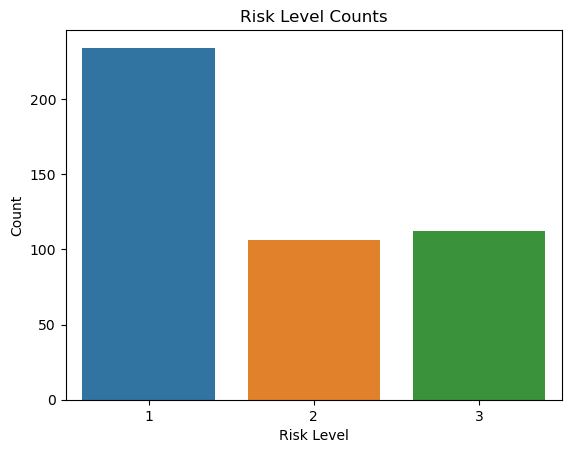

In [15]:
sns.barplot(x=risk_level_values.index,y= risk_level_values.values)

plt.title('Risk Level Counts')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.show()

Majority of the Risk levels are in category 1, low risk

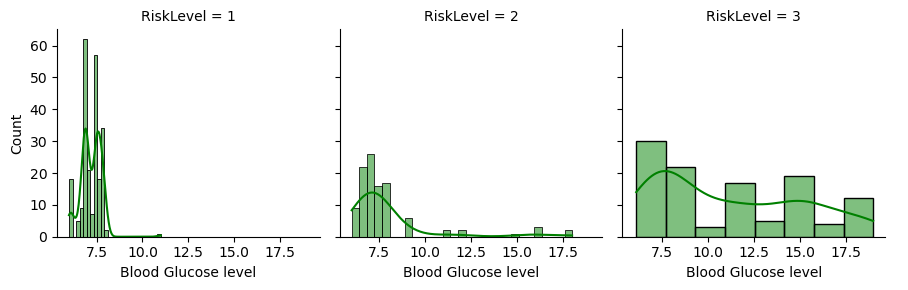

In [122]:
g = sns.FacetGrid(df, col="RiskLevel")
g.map(sns.histplot, "Blood Glucose level", kde=True, color='green')
g.add_legend()
plt.show()

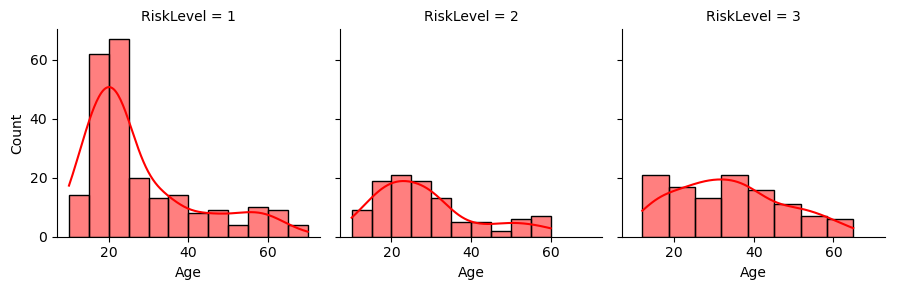

In [119]:
g = sns.FacetGrid(df, col="RiskLevel")
g.map(sns.histplot, "Age", kde=True, color="red")
g.add_legend()
plt.show()

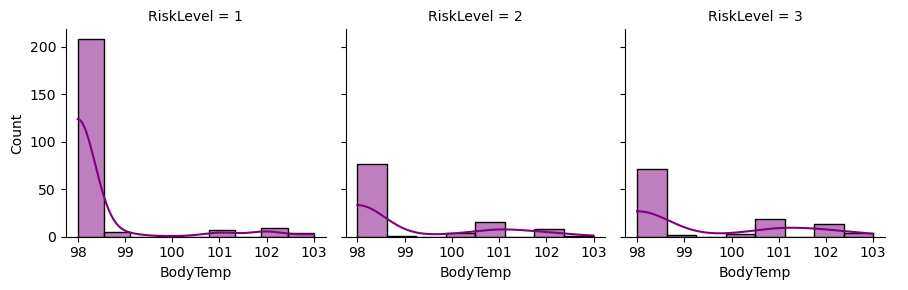

In [121]:
g = sns.FacetGrid(df, col="RiskLevel")
g.map(sns.histplot, "BodyTemp", kde=True, color="purple")
g.add_legend()
plt.show()

These histplot's show that for Risk level 1, most of the features tend to be right-skewed, whereas the highest risk level 3 has less of a skew. This means that in general, Risk level increases as features tend to have higher values. 

Since the whole point of the analysis is to determine factors that affect Risk level, I want to calculate the pearson correlation between risk level and the other parametres in the dataset to the find statistical linear relationships.

<AxesSubplot:>

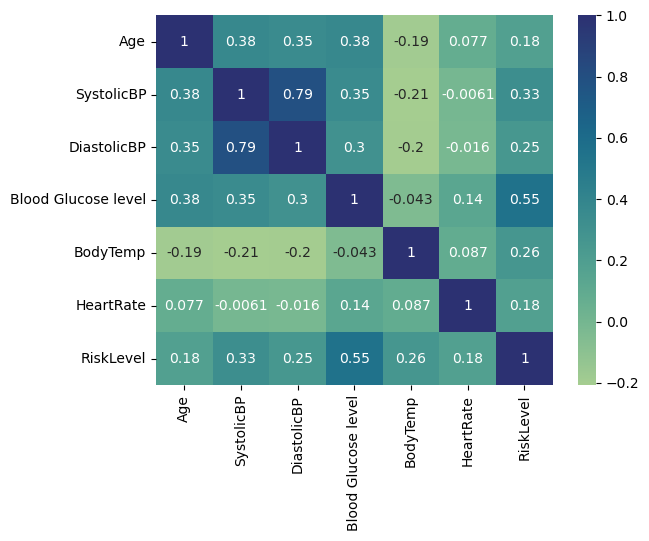

In [16]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="crest")

From the heatmap, I can see that Blood Glucose Level has the highest correlation with Risk Level, other features that also have a positive correlation are SystolicBP, Diastolic BP, and Body Temperature. These will be our features for the Machine learning models. However, I would also like to check later if the other features have any relation with the Risk level.

In [17]:
Features= df[["SystolicBP", "DiastolicBP", "Blood Glucose level","BodyTemp"]]
Features

,SystolicBP,DiastolicBP,Blood Glucose level,BodyTemp
0,130,80,15.0,98.0
1,140,90,13.0,98.0
2,90,70,8.0,100.0
3,140,85,7.0,98.0
4,120,60,6.1,98.0
...,...,...,...,...
447,100,50,6.4,98.0
448,100,60,6.0,98.0
449,100,49,7.6,98.0
450,100,50,6.0,98.0


I now want to check the dataset for outliers. I will use the Z-score value to find out how many outliers each column has. 

In [18]:
z_scores = stats.zscore(df)
z_scores

,Age,SystolicBP,DiastolicBP,Blood Glucose level,BodyTemp,HeartRate,RiskLevel
0,-0.305021,1.089310,0.333484,2.354439,-0.491351,1.479009,1.525884
1,0.422139,1.649455,1.061321,1.646744,-0.491351,-0.484676,1.525884
2,-0.014157,-1.151273,-0.394352,-0.122492,0.927758,0.742627,1.525884
3,0.058559,1.649455,0.697402,-0.476340,-0.491351,-0.484676,1.525884
4,0.422139,0.529164,-1.122188,-0.794802,-0.491351,0.251706,-0.877250
...,...,...,...,...,...,...,...
447,-1.250328,-0.591127,-1.850025,-0.688648,-0.491351,-0.484676,0.324317
448,-1.032180,-0.591127,-1.122188,-0.830187,-0.491351,0.742627,-0.877250
449,-1.032180,-0.591127,-1.922808,-0.264031,-0.491351,0.374436,-0.877250
450,-1.250328,-0.591127,-1.850025,-0.830187,-0.491351,-0.484676,0.324317


In [19]:
z_df = pd.DataFrame(z_scores, columns=df.columns)
z_df

,Age,SystolicBP,DiastolicBP,Blood Glucose level,BodyTemp,HeartRate,RiskLevel
0,-0.305021,1.089310,0.333484,2.354439,-0.491351,1.479009,1.525884
1,0.422139,1.649455,1.061321,1.646744,-0.491351,-0.484676,1.525884
2,-0.014157,-1.151273,-0.394352,-0.122492,0.927758,0.742627,1.525884
3,0.058559,1.649455,0.697402,-0.476340,-0.491351,-0.484676,1.525884
4,0.422139,0.529164,-1.122188,-0.794802,-0.491351,0.251706,-0.877250
...,...,...,...,...,...,...,...
447,-1.250328,-0.591127,-1.850025,-0.688648,-0.491351,-0.484676,0.324317
448,-1.032180,-0.591127,-1.122188,-0.830187,-0.491351,0.742627,-0.877250
449,-1.032180,-0.591127,-1.922808,-0.264031,-0.491351,0.374436,-0.877250
450,-1.250328,-0.591127,-1.850025,-0.830187,-0.491351,-0.484676,0.324317


Since, the common practice of detecting outliers is to consider the absolute z-score grater than 3, I will use that as a reference to find outliers. 

In [20]:
threshold = 3
outliers = z_df[(z_df.abs() > threshold).any(axis=1)]
outliers

,Age,SystolicBP,DiastolicBP,Blood Glucose level,BodyTemp,HeartRate,RiskLevel
9,0.931150,1.089310,0.333484,3.415981,-0.491351,-0.484676,1.525884
20,0.785718,1.649455,1.789157,3.415981,-0.491351,1.969931,1.525884
103,0.931150,1.649455,1.789157,3.415981,-0.491351,1.969931,1.525884
105,1.512878,1.649455,1.425239,3.062134,-0.491351,-1.711980,1.525884
112,1.876458,1.649455,1.789157,3.415981,-0.491351,1.969931,1.525884
116,0.785718,2.769747,1.789157,3.769828,-0.491351,0.374436,1.525884
117,0.203991,1.649455,1.061321,3.415981,-0.491351,1.724470,1.525884
120,1.876458,1.649455,1.425239,3.769828,-0.491351,0.374436,1.525884
152,-0.886748,-1.151273,-0.758270,-0.794802,3.056421,-0.852867,1.525884
163,0.785718,1.649455,1.789157,3.415981,-0.491351,0.374436,1.525884


In [21]:
len(outliers)

25

From the looks of it, There are 25 rows with outliers. The columns Blood Glucose level and Body Temperature have the most number of outliers. I will visualize this using a boxplot to confirm my findings. 

C:\Users\karan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SystolicBP'>

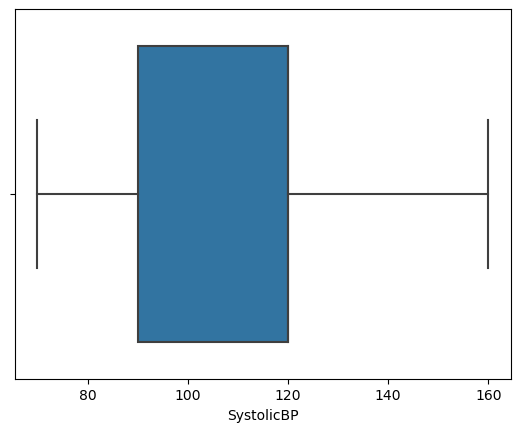

In [22]:
sns.boxplot(Features['SystolicBP'])

C:\Users\karan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DiastolicBP'>

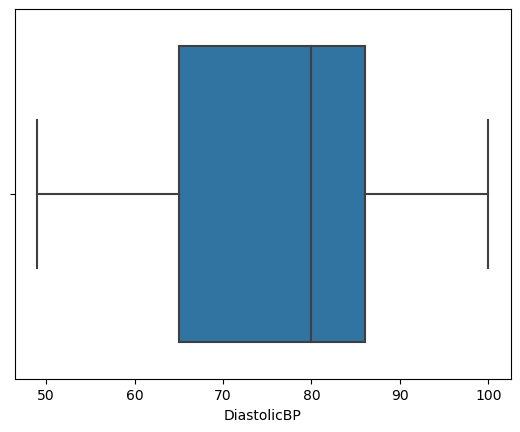

In [23]:
sns.boxplot(Features['DiastolicBP'])

C:\Users\karan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Blood Glucose level'>

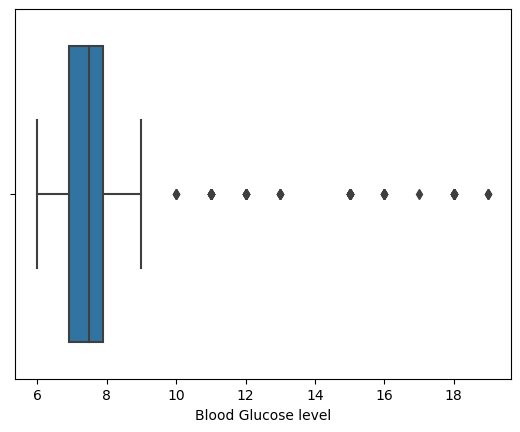

In [24]:
sns.boxplot(Features['Blood Glucose level'])

C:\Users\karan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BodyTemp'>

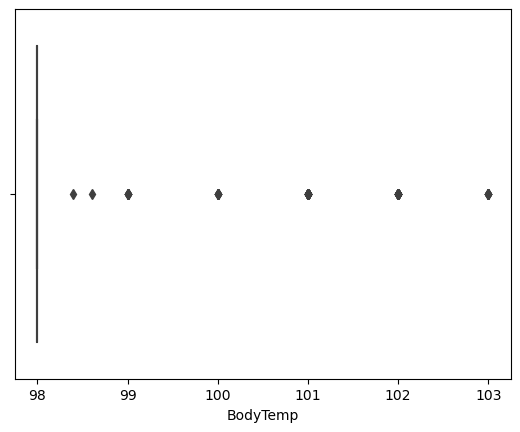

In [25]:
sns.boxplot(Features['BodyTemp'])

As confirmed above from the Z-scores, Blood Glucose levels and Body Temperature have the most number of outliers. However, after looking into these data points, they do not seem to be incorrect observations, they are indeed outliers, but they do not seem to be incorrect observations. Therefore, I will keep them in the dataset. I want to visualize the distribution of these columns

<AxesSubplot:xlabel='Blood Glucose level', ylabel='Count'>

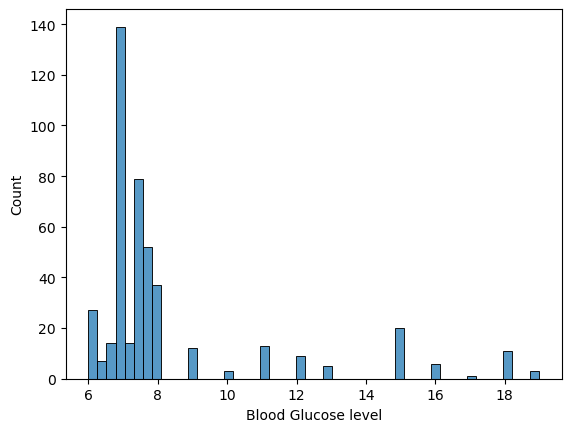

In [26]:
sns.histplot(data=Features, x='Blood Glucose level')

<AxesSubplot:xlabel='BodyTemp', ylabel='Count'>

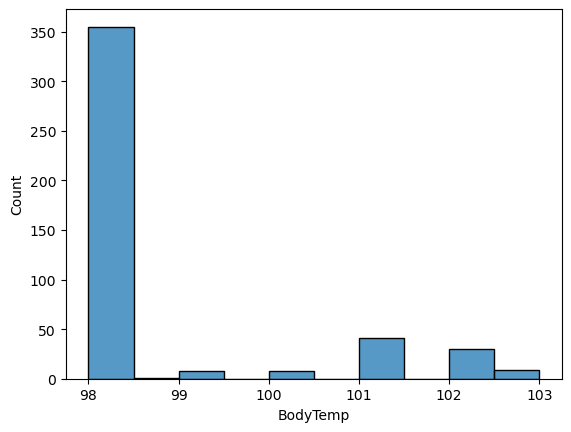

In [27]:
sns.histplot(data=Features, x='BodyTemp')

In [28]:
Features

,SystolicBP,DiastolicBP,Blood Glucose level,BodyTemp
0,130,80,15.0,98.0
1,140,90,13.0,98.0
2,90,70,8.0,100.0
3,140,85,7.0,98.0
4,120,60,6.1,98.0
...,...,...,...,...
447,100,50,6.4,98.0
448,100,60,6.0,98.0
449,100,49,7.6,98.0
450,100,50,6.0,98.0


So far, I've only considered the features that have a linear relationship with the target value 'Risklevel'. Other features might also have some kind of a relationship for feature selection. 

In [29]:
df

,Age,SystolicBP,DiastolicBP,Blood Glucose level,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,3
1,35,140,90,13.0,98.0,70,3
2,29,90,70,8.0,100.0,80,3
3,30,140,85,7.0,98.0,70,3
4,35,120,60,6.1,98.0,76,1
...,...,...,...,...,...,...,...
447,12,100,50,6.4,98.0,70,2
448,15,100,60,6.0,98.0,80,1
449,15,100,49,7.6,98.0,77,1
450,12,100,50,6.0,98.0,70,2


Now creating the Machine learning models: 

## Classification Models

### 1) Logistic Regression

In [30]:
import numpy as np
from sklearn.linear_model import LogisticRegression

X=df[["SystolicBP", "DiastolicBP", "Blood Glucose level","BodyTemp"]]
y=df['RiskLevel']

logreg=LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.70, random_state= 42)

logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)
y_pred

C:\Users\karan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([3, 1, 2, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 2, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2,
       1, 3, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 3, 2, 1, 3, 1, 1, 1, 1, 1,
       2, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 3], dtype=int64)

In [31]:
np.array(y_test)

array([3, 1, 2, 1, 3, 1, 3, 3, 2, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 2, 2, 3,
       1, 3, 3, 1, 2, 1, 3, 1, 1, 1, 1, 3, 1, 2, 1, 2, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 3, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 3, 1, 2, 2, 1,
       1, 1, 1, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 3, 3, 1, 2, 1, 1, 3, 2, 1,
       2, 1, 1, 1, 3, 2, 1, 2, 1, 2, 2, 2, 1, 3, 2, 1, 3, 3, 1, 2, 3, 1,
       3, 1, 3, 2, 2, 2, 3, 3, 1, 1, 3, 2, 1, 1, 1, 1, 3, 2, 3, 2, 1, 1,
       3, 1, 1, 3], dtype=int64)

In [32]:
confusion_matrix(y_test, y_pred)

array([[63,  2,  0],
       [31,  5,  3],
       [13,  1, 18]], dtype=int64)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.59      0.97      0.73        65
           2       0.62      0.13      0.21        39
           3       0.86      0.56      0.68        32

    accuracy                           0.63       136
   macro avg       0.69      0.55      0.54       136
weighted avg       0.66      0.63      0.57       136



For the first logisitic regression model, I get an accuracy of 63%. I want to refine some parameteres to try and improve the model. I'll now use all the features, not just the ones I selected from the pearson correlation 

In [34]:
X=df.drop(columns="RiskLevel")
y=df['RiskLevel']

logreg=LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.70, random_state= 42)

logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)
y_pred

C:\Users\karan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([3, 1, 2, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 2, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2,
       1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 3, 2, 1, 3, 1, 1, 1, 1, 1,
       2, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1,
       1, 1, 1, 3], dtype=int64)

In [35]:
np.array(y_test)

array([3, 1, 2, 1, 3, 1, 3, 3, 2, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 2, 2, 3,
       1, 3, 3, 1, 2, 1, 3, 1, 1, 1, 1, 3, 1, 2, 1, 2, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 3, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 3, 1, 2, 2, 1,
       1, 1, 1, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 3, 3, 1, 2, 1, 1, 3, 2, 1,
       2, 1, 1, 1, 3, 2, 1, 2, 1, 2, 2, 2, 1, 3, 2, 1, 3, 3, 1, 2, 3, 1,
       3, 1, 3, 2, 2, 2, 3, 3, 1, 1, 3, 2, 1, 1, 1, 1, 3, 2, 3, 2, 1, 1,
       3, 1, 1, 3], dtype=int64)

In [36]:
confusion_matrix(y_test, y_pred)

array([[64,  1,  0],
       [31,  5,  3],
       [12,  1, 19]], dtype=int64)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.60      0.98      0.74        65
           2       0.71      0.13      0.22        39
           3       0.86      0.59      0.70        32

    accuracy                           0.65       136
   macro avg       0.73      0.57      0.56       136
weighted avg       0.69      0.65      0.58       136



In [38]:
logreg.score(X_test,y_test)

0.6470588235294118

Accuracy: 66%
Using all features does increase the accuracy a little bit compared to just using the initial features. 

### 2) K-Nearest Neighbors

I will apply the K-Nearest Neighbors Classifier. I will first, just randomly apply 15 neighbours just to see how the model performs

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=15)

X_train, X_test, y_train,y_test = train_test_split(X,y, train_size=0.75, random_state= 42, stratify=y)
knn.fit(X,y)
predictions=knn.predict(X_test)
predictions

array([1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1,
       1, 3, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 3, 2, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 2, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       1, 3, 1], dtype=int64)

In [42]:
np.array(y_test)

array([3, 1, 1, 2, 2, 2, 3, 3, 2, 1, 2, 3, 2, 2, 1, 3, 3, 1, 3, 2, 1, 1,
       1, 3, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 2, 1,
       1, 3, 1, 3, 1, 1, 3, 3, 1, 2, 1, 2, 3, 2, 1, 1, 1, 2, 3, 2, 1, 2,
       2, 1, 2, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 3, 1, 2, 3, 1, 3, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 3, 1, 3, 3, 2, 1, 1, 3, 1, 1, 1, 3, 3, 2, 1, 1,
       2, 3, 1], dtype=int64)

In [43]:
knn.score(X_test,y_test)

0.7079646017699115

In [44]:
confusion_matrix(y_test, predictions)

array([[58,  0,  1],
       [19,  5,  2],
       [ 8,  3, 17]], dtype=int64)

In [45]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.68      0.98      0.81        59
           2       0.62      0.19      0.29        26
           3       0.85      0.61      0.71        28

    accuracy                           0.71       113
   macro avg       0.72      0.59      0.60       113
weighted avg       0.71      0.71      0.66       113



The model seems to perform well with 71% accuracy. I want to further check the optimal number of neighbours to use for the model. 

In [46]:
neighbors = np.arange(1, 16)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 
 {1: 0.9351032448377581, 2: 0.7581120943952803, 3: 0.7551622418879056, 4: 0.7197640117994101, 5: 0.7286135693215339, 6: 0.7020648967551623, 7: 0.7109144542772862, 8: 0.6784660766961652, 9: 0.6784660766961652, 10: 0.6607669616519174, 11: 0.6696165191740413, 12: 0.6755162241887905, 13: 0.6637168141592921, 14: 0.6578171091445427, 15: 0.6519174041297935} 
 {1: 0.5663716814159292, 2: 0.6371681415929203, 3: 0.6460176991150443, 4: 0.6548672566371682, 5: 0.5929203539823009, 6: 0.6371681415929203, 7: 0.6548672566371682, 8: 0.6548672566371682, 9: 0.672566371681416, 10: 0.6814159292035398, 11: 0.6814159292035398, 12: 0.6637168141592921, 13: 0.6194690265486725, 14: 0.6371681415929203, 15: 0.6460176991150443}


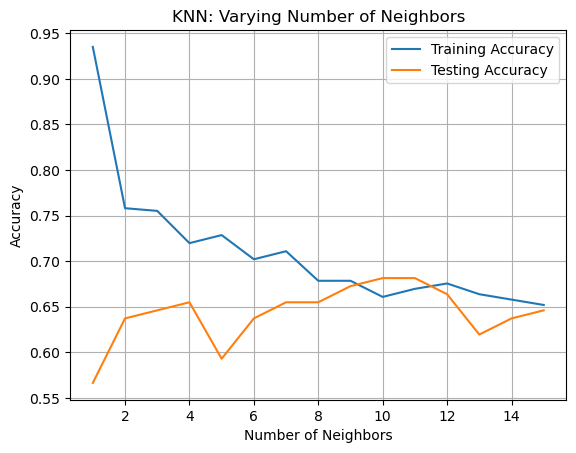

In [47]:
plt.title("KNN: Varying Number of Neighbors")

plt.plot(neighbors,train_accuracies.values(),label="Training Accuracy")

plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

plt.grid()
plt.show()

For the Testing set, accuracy peaks at 10 neighbors, therefore, I will now create a Knn model with 10 neighbors to potentially get a better model. 

In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=10)

X_train, X_test, y_train,y_test = train_test_split(X,y, train_size=0.75, random_state= 42, stratify=y)
knn.fit(X,y)
predictions=knn.predict(X_test)
predictions

array([1, 1, 1, 1, 2, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1,
       1, 2, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 3, 2, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 2, 2, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       2, 3, 1], dtype=int64)

In [49]:
np.array(y_test)

array([3, 1, 1, 2, 2, 2, 3, 3, 2, 1, 2, 3, 2, 2, 1, 3, 3, 1, 3, 2, 1, 1,
       1, 3, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 2, 1,
       1, 3, 1, 3, 1, 1, 3, 3, 1, 2, 1, 2, 3, 2, 1, 1, 1, 2, 3, 2, 1, 2,
       2, 1, 2, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 3, 1, 2, 3, 1, 3, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 3, 1, 3, 3, 2, 1, 1, 3, 1, 1, 1, 3, 3, 2, 1, 1,
       2, 3, 1], dtype=int64)

In [50]:
confusion_matrix(y_test,predictions)

array([[58,  1,  0],
       [16,  9,  1],
       [ 9,  4, 15]], dtype=int64)

In [51]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.70      0.98      0.82        59
           2       0.64      0.35      0.45        26
           3       0.94      0.54      0.68        28

    accuracy                           0.73       113
   macro avg       0.76      0.62      0.65       113
weighted avg       0.75      0.73      0.70       113



Now, the model performs slightly better with a 73% accuracy. 

I want to now perform GridSearchCV and KFold validation to see if the model performs better 

In [52]:
from sklearn.model_selection import GridSearchCV

kf=KFold(n_splits=5,shuffle=True,random_state=42)
parameter={'n_neighbors': np.arange(2, 30, 1)}

knn_cv=GridSearchCV(knn, param_grid=parameter, cv=kf, verbose=1)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'n_neighbors': 9}


In [53]:
knn=KNeighborsClassifier(n_neighbors=9)

X_train, X_test, y_train,y_test = train_test_split(X,y, train_size=0.75, random_state= 42, stratify=y)
knn.fit(X,y)
predictions=knn.predict(X_test)
predictions

array([3, 1, 1, 1, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 1, 1,
       1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1,
       1, 3, 1, 3, 1, 1, 1, 1, 2, 2, 1, 1, 3, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       2, 3, 3], dtype=int64)

In [54]:
confusion_matrix(y_test,predictions)

array([[56,  1,  2],
       [16,  8,  2],
       [ 9,  2, 17]], dtype=int64)

In [55]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.69      0.95      0.80        59
           2       0.73      0.31      0.43        26
           3       0.81      0.61      0.69        28

    accuracy                           0.72       113
   macro avg       0.74      0.62      0.64       113
weighted avg       0.73      0.72      0.69       113



With a 72% accuracy, GridSearchCV and KFold validation doesn't improve the model. 

### 3. Support vector machine

In [87]:
from sklearn.svm import SVC

svc_classifier_linear = SVC(kernel='linear')

X_train, X_test, y_train,y_test = train_test_split(X,y, train_size=0.70, random_state= 42)
svc_classifier.fit(X_train, y_train)

y_pred = svc_classifier.predict(X_test)
y_pred

array([3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 3], dtype=int64)

In [88]:
np.array(y_test)

array([3, 1, 2, 1, 3, 1, 3, 3, 2, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 2, 2, 3,
       1, 3, 3, 1, 2, 1, 3, 1, 1, 1, 1, 3, 1, 2, 1, 2, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 3, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 3, 1, 2, 2, 1,
       1, 1, 1, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 3, 3, 1, 2, 1, 1, 3, 2, 1,
       2, 1, 1, 1, 3, 2, 1, 2, 1, 2, 2, 2, 1, 3, 2, 1, 3, 3, 1, 2, 3, 1,
       3, 1, 3, 2, 2, 2, 3, 3, 1, 1, 3, 2, 1, 1, 1, 1, 3, 2, 3, 2, 1, 1,
       3, 1, 1, 3], dtype=int64)

In [89]:
confusion_matrix(y_test, y_pred)

array([[65,  0,  0],
       [35,  0,  4],
       [14,  0, 18]], dtype=int64)

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.57      1.00      0.73        65
           2       0.00      0.00      0.00        39
           3       0.82      0.56      0.67        32

    accuracy                           0.61       136
   macro avg       0.46      0.52      0.46       136
weighted avg       0.47      0.61      0.50       136



C:\Users\karan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\karan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\karan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [69]:
svc_classifier_rbf = SVC(kernel='rbf')

X_train, X_test, y_train,y_test = train_test_split(X,y, train_size=0.70, random_state= 42)
svc_classifier.fit(X_train, y_train)

y_pred = svc_classifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [70]:
confusion_matrix(y_test, y_pred)

array([[65,  0,  0],
       [38,  0,  1],
       [18,  0, 14]], dtype=int64)

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.54      1.00      0.70        65
           2       0.00      0.00      0.00        39
           3       0.93      0.44      0.60        32

    accuracy                           0.58       136
   macro avg       0.49      0.48      0.43       136
weighted avg       0.48      0.58      0.47       136



C:\Users\karan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\karan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\karan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [72]:
svc_classifier_poly = SVC(kernel='poly')

X_train, X_test, y_train,y_test = train_test_split(X,y, train_size=0.70, random_state= 42)
svc_classifier.fit(X_train, y_train)

y_pred = svc_classifier.predict(X_test)
y_pred

array([3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 3], dtype=int64)

In [77]:
confusion_matrix(y_test, y_pred)

array([[65,  0,  0],
       [35,  0,  4],
       [14,  0, 18]], dtype=int64)

In [78]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.57      1.00      0.73        65
           2       0.00      0.00      0.00        39
           3       0.82      0.56      0.67        32

    accuracy                           0.61       136
   macro avg       0.46      0.52      0.46       136
weighted avg       0.47      0.61      0.50       136



C:\Users\karan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\karan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\karan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 4. Decision Tree

In [105]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=6, random_state=42)
dt.fit(X_train, y_train)

y_pred=dt.predict(X_test)
y_pred

array([3, 1, 2, 1, 2, 1, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 3, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 2, 1, 2, 1, 1, 3, 1, 1, 2, 2, 1, 2, 3, 1, 1, 3, 1,
       3, 1, 2, 1, 1, 1, 3, 3, 1, 2, 3, 2, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1,
       1, 1, 1, 3], dtype=int64)

In [106]:
confusion_matrix(y_test, y_pred)

array([[63,  2,  0],
       [27,  9,  3],
       [ 4,  8, 20]], dtype=int64)

In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.67      0.97      0.79        65
           2       0.47      0.23      0.31        39
           3       0.87      0.62      0.73        32

    accuracy                           0.68       136
   macro avg       0.67      0.61      0.61       136
weighted avg       0.66      0.68      0.64       136



With a depth of 6 nodes, the tree creates a model accuracy of 68%

In [108]:
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train, y_train)

y_pred=dt.predict(X_test)
y_pred

array([3, 1, 2, 2, 2, 1, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2,
       1, 3, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1,
       1, 1, 1, 2, 3, 2, 1, 2, 3, 1, 1, 1, 1, 3, 2, 2, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 3, 3, 1, 2, 1, 1, 3, 1, 1, 2, 2, 1, 2, 1, 2, 1, 3, 2,
       3, 1, 2, 1, 1, 1, 3, 3, 1, 2, 3, 2, 1, 1, 1, 1, 3, 1, 3, 2, 1, 1,
       3, 1, 1, 3], dtype=int64)

In [110]:
confusion_matrix(y_test, y_pred)

array([[56,  8,  1],
       [21, 13,  5],
       [ 4,  8, 20]], dtype=int64)

In [111]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.69      0.86      0.77        65
           2       0.45      0.33      0.38        39
           3       0.77      0.62      0.69        32

    accuracy                           0.65       136
   macro avg       0.64      0.61      0.61       136
weighted avg       0.64      0.65      0.64       136



With a depth of 10 nodes, the tree creates a model accuracy of 65%

In [112]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

y_pred=dt.predict(X_test)
y_pred

array([3, 1, 1, 1, 3, 1, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3, 1,
       3, 1, 3, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1,
       1, 1, 1, 3], dtype=int64)

In [113]:
acc = accuracy_score(y_test, y_pred)
acc

0.6691176470588235

And With a depth of 3 nodes, the tree creates a model accuracy of 66%

### Conclusion: K Nearest neighbours is the best model for this data, as it has the highest accuracy of 73% accurate predictions